# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

# Load Data

In [2]:
df = pd.read_csv("payment.csv")

In [3]:
df.shape

(6362620, 11)


This dataset has 6362620 rows and 11 columns.


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.duplicated().sum()

0

This data has no duplicate values

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

This data had no null values.

In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Outliers 

<AxesSubplot: xlabel='step'>

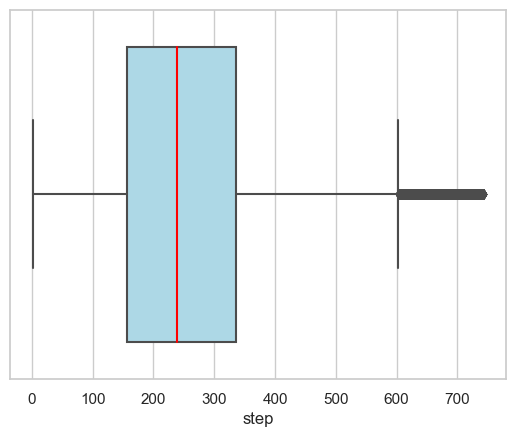

In [9]:
sns.set(style="whitegrid")
sns.boxplot(x=df['step'], boxprops = dict(facecolor = "lightblue"), medianprops = dict(color = "red", linewidth = 1.5))

In [10]:
q1 = df["step"].quantile(0.25)
q3 = df["step"].quantile(0.75)
iqr = q3-q1
Ll = q1-1.5*iqr
Ul = q3+1.5*iqr

In [11]:
Ll,Ul

(-112.5, 603.5)

In [12]:
df = df[(df["step"]>Ll) & (df["step"] < Ul)]

In [13]:
df["step"].describe()

count    6.259932e+06
mean     2.363396e+02
std      1.322522e+02
min      1.000000e+00
25%      1.550000e+02
50%      2.360000e+02
75%      3.310000e+02
max      6.030000e+02
Name: step, dtype: float64

<AxesSubplot: xlabel='step'>

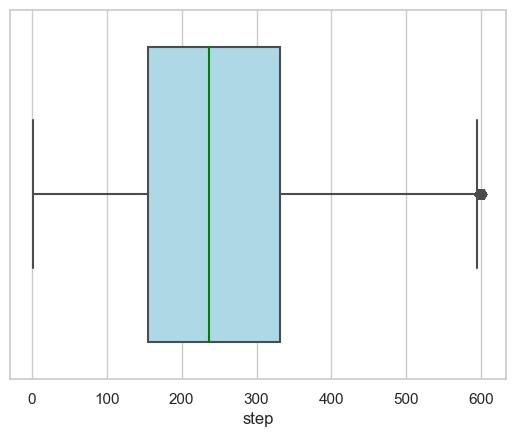

In [14]:
sns.set(style="whitegrid")
sns.boxplot(x=df['step'], boxprops = dict(facecolor = "lightblue"), medianprops = dict(color = "green", linewidth = 1.5))

<AxesSubplot: xlabel='amount'>

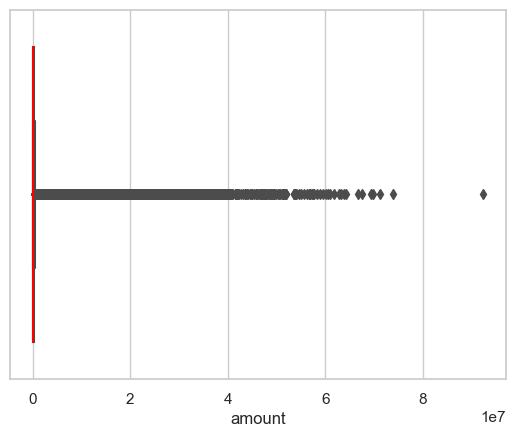

In [15]:
sns.set(style="whitegrid")
sns.boxplot(x=df['amount'], boxprops = dict(facecolor = "lightblue"), medianprops = dict(color = "red", linewidth = 1.5))

In [16]:
q1 = df["amount"].quantile(0.25)
q3 = df["amount"].quantile(0.75)
iqr = q3-q1
Ll = q1-1.5*iqr
Ul = q3+1.5*iqr

In [17]:
Ll,Ul

(-279631.29, 501793.53)

In [18]:
df=df[(df["amount"]>Ll) & (df["amount"] < Ul)]

In [19]:
df["amount"].describe()

count    5.927252e+06
mean     1.115586e+05
std      1.204087e+05
min      0.000000e+00
25%      1.237984e+04
50%      6.319850e+04
75%      1.829690e+05
max      5.017925e+05
Name: amount, dtype: float64

<AxesSubplot: xlabel='amount'>

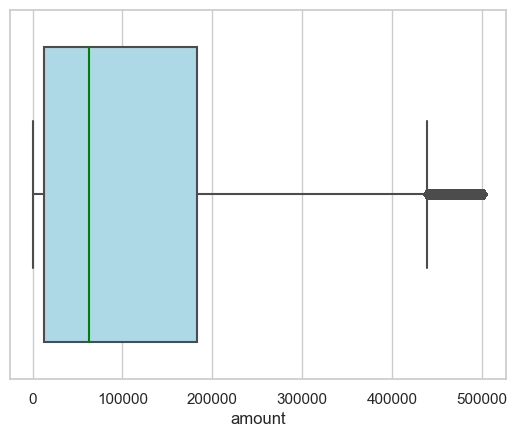

In [20]:
sns.set(style="whitegrid")
sns.boxplot(x=df['amount'], boxprops = dict(facecolor = "lightblue"), medianprops = dict(color = "green", linewidth = 1.5))

<AxesSubplot: xlabel='oldbalanceOrg'>

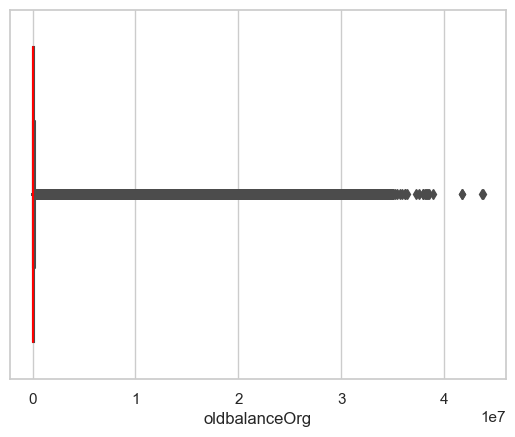

In [21]:
sns.set(style="whitegrid")
sns.boxplot(x=df['oldbalanceOrg'], boxprops = dict(facecolor = "lightblue"), medianprops = dict(color = "red", linewidth = 1.5))

In [22]:
q1 = df["oldbalanceOrg"].quantile(0.25)
q3 = df["oldbalanceOrg"].quantile(0.75)
iqr = q3-q1
Ll = q1-1.5*iqr
Ul = q3+1.5*iqr

In [23]:
Ll,Ul

(-170051.17875, 283418.63125)

In [24]:
df=df[(df["oldbalanceOrg"]>Ll) & (df["oldbalanceOrg"] < Ul)]

In [25]:
df["oldbalanceOrg"].describe()

count    4.882889e+06
mean     3.202282e+04
std      5.568360e+04
min      0.000000e+00
25%      0.000000e+00
50%      5.043000e+03
75%      3.740700e+04
max      2.834177e+05
Name: oldbalanceOrg, dtype: float64

<AxesSubplot: xlabel='oldbalanceOrg'>

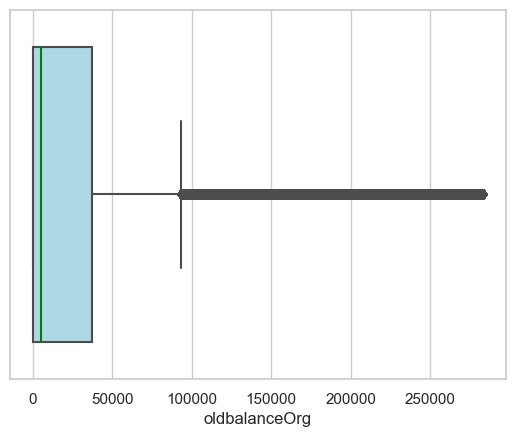

In [26]:
sns.set(style="whitegrid")
sns.boxplot(x=df['oldbalanceOrg'], boxprops = dict(facecolor = "lightblue"), medianprops = dict(color = "green", linewidth = 1.5))

<AxesSubplot: xlabel='newbalanceOrig'>

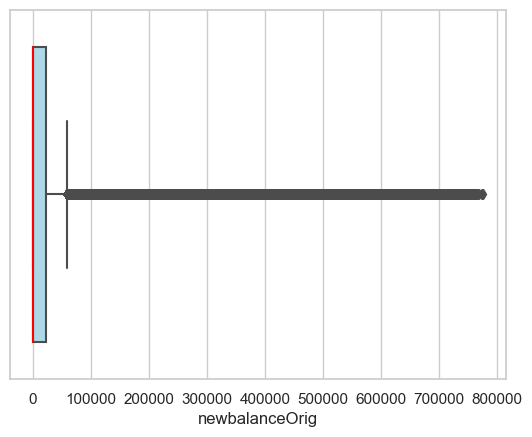

In [27]:
sns.set(style="whitegrid")
sns.boxplot(x=df['newbalanceOrig'], boxprops = dict(facecolor = "lightblue"), medianprops = dict(color = "red", linewidth = 1.5))

In [28]:
q1 = df["newbalanceOrig"].quantile(0.25)
q3 = df["newbalanceOrig"].quantile(0.75)
iqr = q3-q1
Ll = q1-1.5*iqr
Ul = q3+1.5*iqr

In [29]:
Ll,Ul

(-35955.915, 59926.525)

In [30]:
df=df[(df["newbalanceOrig"]>Ll) & (df["newbalanceOrig"] < Ul)]

In [31]:
df["newbalanceOrig"].describe()

count    3.972694e+06
mean     4.273064e+03
std      1.153003e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.992651e+04
Name: newbalanceOrig, dtype: float64

<AxesSubplot: xlabel='newbalanceOrig'>

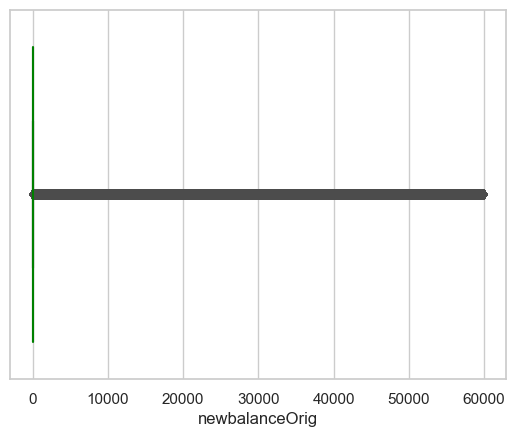

In [32]:
sns.set(style="whitegrid")
sns.boxplot(x=df['newbalanceOrig'], boxprops = dict(facecolor = "lightblue"), medianprops = dict(color = "green", linewidth = 1.5))

In [33]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

<AxesSubplot: xlabel='newbalanceDest'>

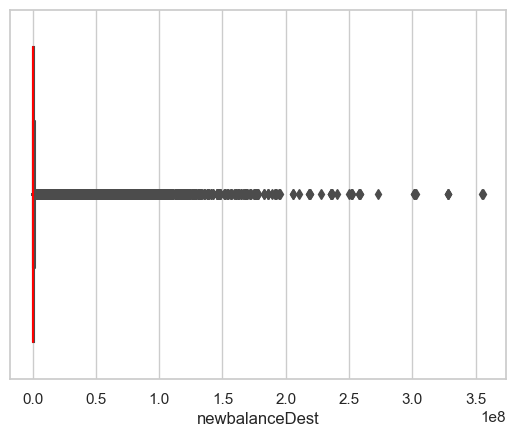

In [34]:
sns.set(style="whitegrid")
sns.boxplot(x=df['newbalanceDest'], boxprops = dict(facecolor = "lightblue"), medianprops = dict(color = "red", linewidth = 1.5))

In [35]:
q1 = df["newbalanceDest"].quantile(0.25)
q3 = df["newbalanceDest"].quantile(0.75)
iqr = q3-q1
Ll = q1-1.5*iqr
Ul = q3+1.5*iqr

In [36]:
Ll,Ul

(-1369197.78375, 2281996.30625)

In [37]:
df=df[(df["newbalanceDest"]>Ll) & (df["newbalanceDest"] < Ul)]

In [38]:
df["newbalanceDest"].describe()

count    3.517414e+06
mean     3.651331e+05
std      5.355748e+05
min      0.000000e+00
25%      0.000000e+00
50%      6.949071e+04
75%      5.514744e+05
max      2.281990e+06
Name: newbalanceDest, dtype: float64

<AxesSubplot: xlabel='newbalanceDest'>

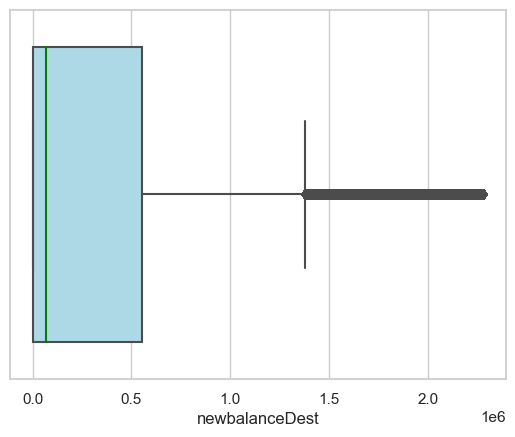

In [39]:
sns.set(style="whitegrid")
sns.boxplot(x=df['newbalanceDest'], boxprops = dict(facecolor = "lightblue"), medianprops = dict(color = "green", linewidth = 1.5))

In [40]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0


In [41]:
df.shape

(3517414, 11)

After checking outliers, we get 3,517,417 data; all but 2,845,206 data are lost, but this is most important for this data.

# Data Visualization

<AxesSubplot: xlabel='type', ylabel='count'>

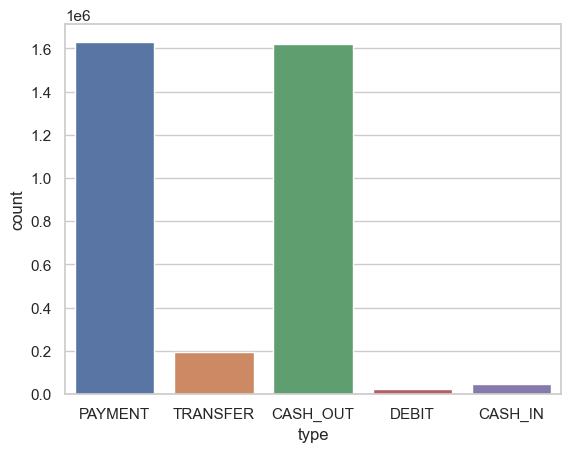

In [42]:
sns.countplot(x="type", data=df)

<AxesSubplot: xlabel='type', ylabel='amount'>

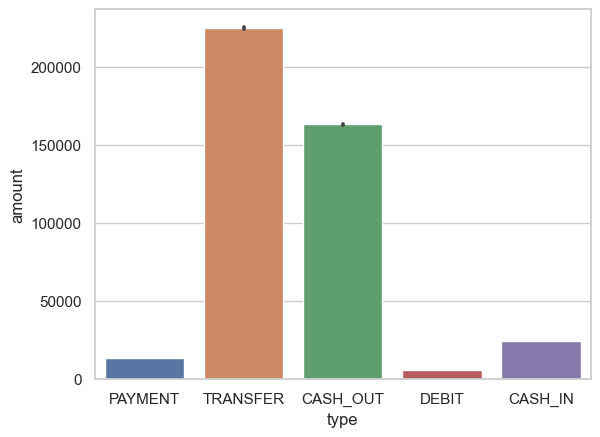

In [43]:
sns.barplot(x="type",y = "amount",  data=df)

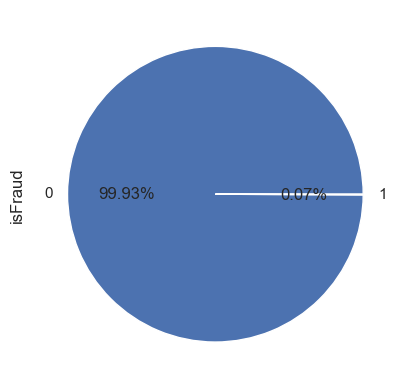

In [44]:
df['isFraud'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

C:\Users\Ram\AppData\Local\Temp\ipykernel_20336\1156875748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['step'], bins=100)


<AxesSubplot: xlabel='step', ylabel='Density'>

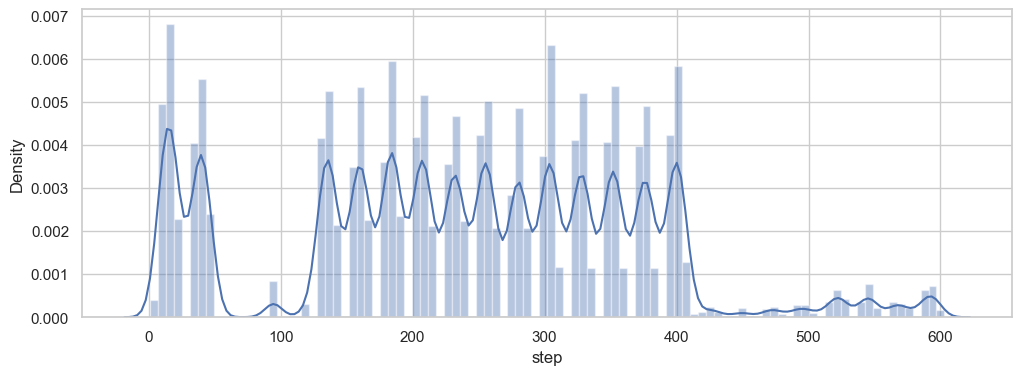

In [45]:
plt.figure(figsize=(12, 4))
sns.distplot(df['step'], bins=100)

# Convert category value to numerical value

In [46]:
df["type"]= df["type"].astype ('category')
df [ "type"]= df ["type"].cat.codes

In [47]:
df["nameOrig"]= df["nameOrig"].astype ('category')
df [ "nameOrig"]= df [ "nameOrig"].cat.codes

In [48]:
df["nameDest"]= df["nameDest"].astype ('category')
df [ "nameDest"]= df [ "nameDest"].cat.codes

In [49]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,3,1864.28,1210366,21249.0,19384.72,1347539,0.0,0.0,0,0
2,1,4,181.00,553952,181.0,0.00,359013,0.0,0.0,1,0
3,1,1,181.00,3223748,181.0,0.00,319740,21182.0,0.0,1,0
4,1,3,11668.14,1906203,41554.0,29885.86,661449,0.0,0.0,0,0
5,1,3,7817.71,3333380,53860.0,46042.29,1736196,0.0,0.0,0,0


# Correlation

In [50]:
df.corr

<bound method DataFrame.corr of          step  type     amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
1           1     3    1864.28   1210366       21249.00        19384.72   
2           1     4     181.00    553952         181.00            0.00   
3           1     1     181.00   3223748         181.00            0.00   
4           1     3   11668.14   1906203       41554.00        29885.86   
5           1     3    7817.71   3333380       53860.00        46042.29   
...       ...   ...        ...       ...            ...             ...   
6259915   602     1  274125.77   1479996      274125.77            0.00   
6259916   602     4  232185.56   1258626      232185.56            0.00   
6259924   603     4   39247.74   1411917       39247.74            0.00   
6259930   603     4  158879.10    411792      158879.10            0.00   
6259931   603     1  158879.10   1291374      158879.10            0.00   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlagg

<AxesSubplot: >

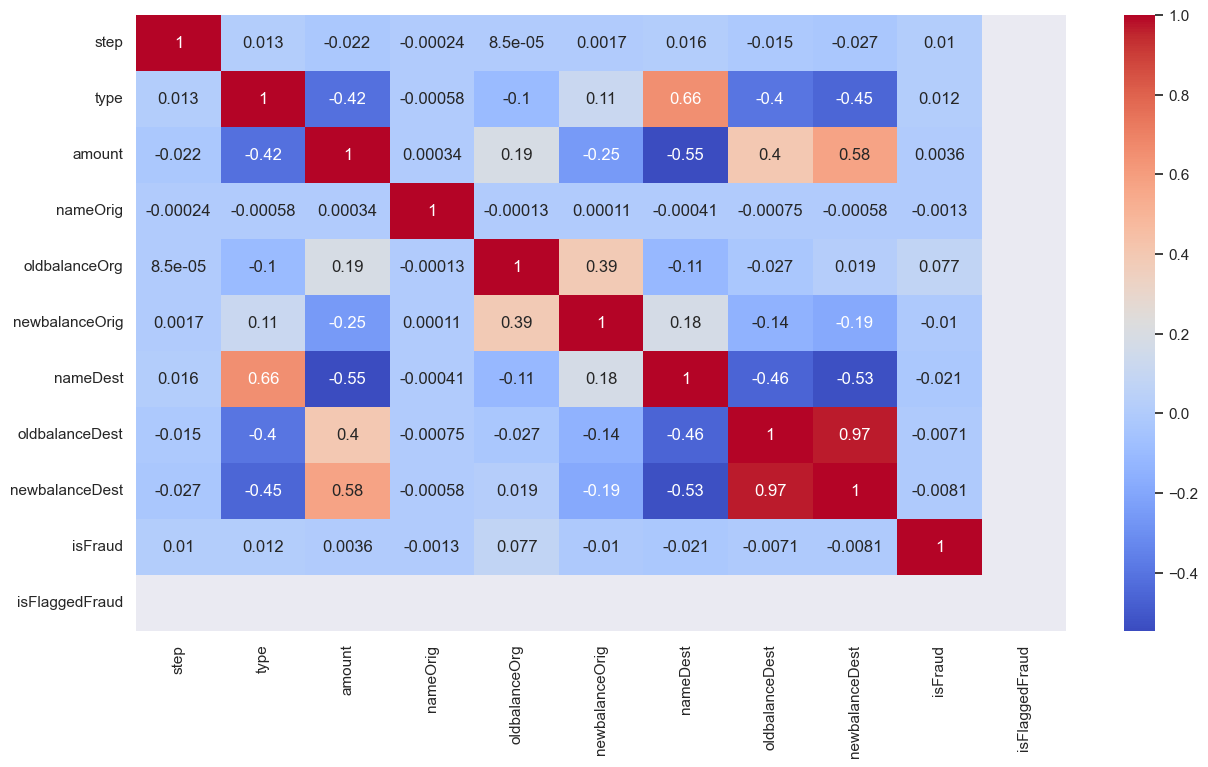

In [51]:
sns.set(rc={"figure.figsize": (15, 8)})
sns.heatmap(df.corr(), cmap= 'coolwarm', annot = True)

In [52]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,3,1864.28,1210366,21249.00,19384.72,1347539,0.00,0.00,0,0
2,1,4,181.00,553952,181.00,0.00,359013,0.00,0.00,1,0
3,1,1,181.00,3223748,181.00,0.00,319740,21182.00,0.00,1,0
4,1,3,11668.14,1906203,41554.00,29885.86,661449,0.00,0.00,0,0
5,1,3,7817.71,3333380,53860.00,46042.29,1736196,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6259915,602,1,274125.77,1479996,274125.77,0.00,387790,0.00,274125.77,1,0
6259916,602,4,232185.56,1258626,232185.56,0.00,47560,0.00,0.00,1,0
6259924,603,4,39247.74,1411917,39247.74,0.00,123174,0.00,0.00,1,0
6259930,603,4,158879.10,411792,158879.10,0.00,88000,0.00,0.00,1,0


I dropped "isFlaggedFraud" from this column because this column was not important for the data.

In [68]:
df.drop(columns=['isFlaggedFraud'],inplace=True)

In [69]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1,1,3,1864.28,1210366,21249.0,19384.72,1347539,0.0,0.0,0
2,1,4,181.00,553952,181.0,0.00,359013,0.0,0.0,1
3,1,1,181.00,3223748,181.0,0.00,319740,21182.0,0.0,1
4,1,3,11668.14,1906203,41554.0,29885.86,661449,0.0,0.0,0
5,1,3,7817.71,3333380,53860.0,46042.29,1736196,0.0,0.0,0


# Import  ML libraries 

In [73]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier,plot_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

# Data Split

In [74]:
X = df.drop(['isFraud'], axis = 1)
y = df['isFraud']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

20% of testing data and 80% of training data

In [76]:
X_train.shape

(2813931, 9)

In [77]:
X_test.shape

(703483, 9)

In [78]:
y_train.shape

(2813931,)

In [79]:
y_test.shape

(703483,)

# Model Building

## Logistic Regression

In [80]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.9994043921459367


In [81]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)


report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    702937
           1       0.75      0.35      0.48       546

    accuracy                           1.00    703483
   macro avg       0.87      0.68      0.74    703483
weighted avg       1.00      1.00      1.00    703483



## DecisionTreeClassifier

In [82]:
# Create and train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.9995508064871503


In [83]:
# Create a Decision Tree classifier
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    702937
           1       0.74      0.68      0.71       546

    accuracy                           1.00    703483
   macro avg       0.87      0.84      0.85    703483
weighted avg       1.00      1.00      1.00    703483



## RandomForestClassifier

In [84]:
# Create and train the random forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.999623302908528


In [85]:
# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    702937
           1       0.98      0.53      0.69       546

    accuracy                           1.00    703483
   macro avg       0.99      0.76      0.84    703483
weighted avg       1.00      1.00      1.00    703483



## KNN classifier

In [87]:
# Create a KNN classifier with k=3
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [89]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,100,150,200]: 
  knn= KNeighborsClassifier(i)
  knn.fit(X_train, y_train) 
  print("K value :", i, "Train Score : ", knn.score(X_train,y_train), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_test, y_test, cv=10)))

K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.9988798592672821
K value : 2 Train Score :  0.9994946571184581 Cross Value Accuracy : 0.9992679283040038
K value : 3 Train Score :  0.999491814120531 Cross Value Accuracy : 0.9992636638914751
K value : 4 Train Score :  0.9994306896650984 Cross Value Accuracy : 0.9992608208420215
K value : 5 Train Score :  0.999434954161989 Cross Value Accuracy : 0.9992707713736643
K value : 6 Train Score :  0.9994125655533131 Cross Value Accuracy : 0.9992593994183269
K value : 7 Train Score :  0.9994125655533131 Cross Value Accuracy : 0.9992764573513326
K value : 8 Train Score :  0.9993944414415279 Cross Value Accuracy : 0.9992693498489373
K value : 9 Train Score :  0.9993994166879003 Cross Value Accuracy : 0.9992721928781846
K value : 10 Train Score :  0.9993827140750786 Cross Value Accuracy : 0.9992608208420215
K value : 20 Train Score :  0.9993549948452893 Cross Value Accuracy : 0.9992295478638118
K value : 30 Train Score :  0.9993283417397228 

In [90]:
# Create a K-Nearest Neighbors classifier
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (K) as needed

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    702937
           1       0.65      0.19      0.29       546

    accuracy                           1.00    703483
   macro avg       0.82      0.59      0.64    703483
weighted avg       1.00      1.00      1.00    703483



## SGDClassifier

In [91]:
# Create an SGDClassifier
sgd_classifier = SGDClassifier(loss='log', max_iter=1000, random_state=42)

# Train the model
sgd_classifier.fit(X_train, y_train)

# Make predictions
y_pred = sgd_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

C:\Users\Ram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy: 1.00


In [92]:
# Create an SGDClassifier for binary classification
model = SGDClassifier(loss='log', random_state=42, max_iter=1000)  # Adjust parameters as needed

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

C:\Users\Ram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    702937
           1       0.53      0.10      0.17       546

    accuracy                           1.00    703483
   macro avg       0.77      0.55      0.58    703483
weighted avg       1.00      1.00      1.00    703483



## Naïve Bayes classifier

In [93]:
# Create a Naïve Bayes classifier (MultinomialNB is suitable for text data)
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [94]:


# Create a Multinomial Naïve Bayes classifier
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86    702937
           1       0.00      0.81      0.01       546

    accuracy                           0.75    703483
   macro avg       0.50      0.78      0.43    703483
weighted avg       1.00      0.75      0.86    703483



In [95]:
# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 3,  # Number of classes
    'max_depth': 3,  # Maximum tree depth
    'eta': 0.1,  # Learning rate
    'subsample': 0.7,  # Fraction of training data to use in each boosting round
    'colsample_bytree': 0.7,  # Fraction of features to use in each boosting round
}

# Train the XGBoost model
num_round = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred = model.predict(dtest)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## XGBoost

In [100]:
# Create an XGBoost classifier
model = XGBClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)



Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    702937
           1       0.97      0.70      0.81       546

    accuracy                           1.00    703483
   macro avg       0.98      0.85      0.90    703483
weighted avg       1.00      1.00      1.00    703483



# Feature Importance

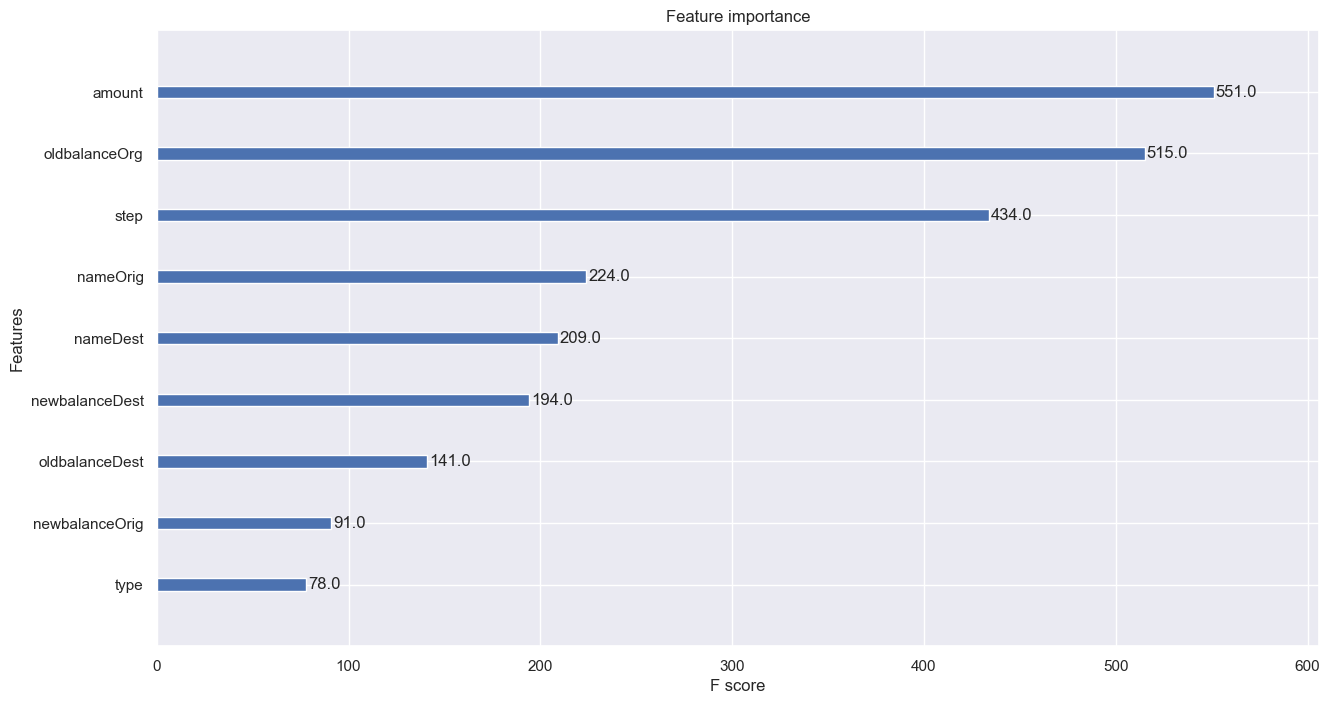

In [99]:
# Create an XGBoost model (replace with your model and data)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)  # Train the model on your dataset

# Plot feature importance
xgb.plot_importance(model)
plt.show()

total of nine fratures The most important feature is the amount.

# Conclusion

There are nine features, a target value, and, best of all, 99% fraud-free data that calculates the new balance and the old balance. Data transfer, all operations are secure transactions, and above all, the best model is XGBoost, which gave an accuracy score of 1.00. And the f1 score for fraud detection was 0.81 and no fraud detection was 1.00.